In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [45]:
# 1: Histogram Equalization Function
def hist_equalization(img):
    h,w = img.shape
    hist=np.zeros(256)
    for i in range(h):
        for j in range(w):
            val=img[i][j]
            hist[val]+=1
    
    pdf = hist / hist.sum()
    cdf = np.cumsum(pdf)
    cdf_normalized = (cdf * 255).astype(np.uint8)
    return cdf_normalized[img]



In [46]:
# 2: Adaptive Histogram Equalization (Manual)

def adaptive_hist_equalization(img, grid_size):
    h, w = img.shape
    gh, gw = h // grid_size[0], w // grid_size[1]
    output = np.zeros_like(img)
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            y1, y2 = i*gh, (i+1)*gh
            x1, x2 = j*gw, (j+1)*gw
            block = img[y1:y2, x1:x2]
            output[y1:y2, x1:x2] = hist_equalization(block)
    return output


In [47]:
# 3: CLAHE Implementation
def contrast_limited_adaptive_hist_equalization(img, grid_size, clip_limit):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
    return clahe.apply(img)

In [48]:
# 4:AHE + Bilinear Filtering 
# When set clipLimit=100.0 , performing Adaptive Histogram Equalization (AHE).Bi-linear is always active.
def ahe_bilinear_filter(img, grid_size):
    clahe = cv2.createCLAHE(clipLimit=100.0, tileGridSize=grid_size)
    ahe_img = clahe.apply(img)
    return ahe_img

In [49]:

def main():
    img = cv2.imread('Image/low_contrast/image4.jpg', cv2.IMREAD_GRAYSCALE)
    # img = cv2.resize(img, (400, 400))

    # Histogram Equalization
    he_img = hist_equalization(img)

    # Adaptive histogram Equalization
    ahe_img = adaptive_hist_equalization(img,(16,16))

    # CLAHE with different clip values
    clahe_1 = contrast_limited_adaptive_hist_equalization(img, (16,16), 1.0)
    clahe_2 = contrast_limited_adaptive_hist_equalization(img, (16,16), 2.0)
    clahe_4 = contrast_limited_adaptive_hist_equalization(img, (16,16), 4.0)
    ahe_bilinear = ahe_bilinear_filter(img, (16,16))

    titles = [
        'Original Image', 
        'Histogram Equalization (HE)',
        'Adaptive HE (AHE)',
        'CLAHE (clip=1.0)',
        'CLAHE (clip=2.0)',
        'CLAHE (clip=4.0)',
        'AHE + Bilinear Filtering'
    ]

    images = [img, he_img, ahe_img, clahe_1, clahe_2, clahe_4, ahe_bilinear]

    plt.figure(figsize=(15,10))
    for i in range(7):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


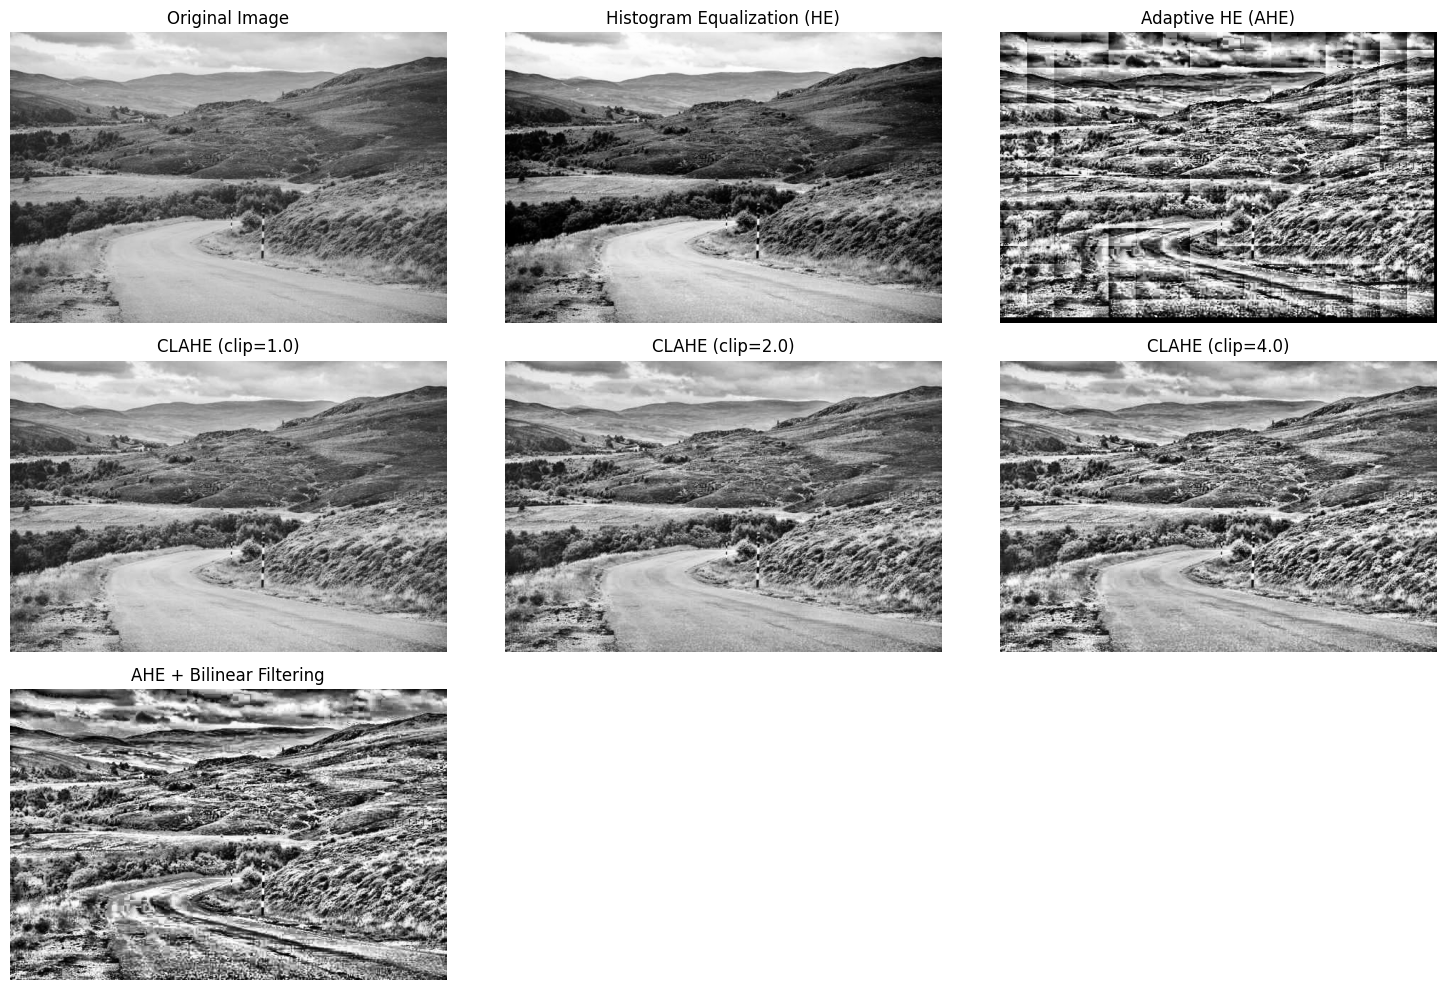

In [50]:
if __name__ == "__main__":
    main()